In [1]:
'''
step 1 : importing the libraries
step 2 : read the data
step 3 : check the shape of the data
step 4 : view the smples
step 5 : basic eda
step 6 : to check the null value
step 7 : data preprocesing - converting categorical into numerical
step 8 : train test split
step 9 : traininig the model
step 10 : test the model
step 11 :  calculating the mean squared error loss and accuracy(R2 square)
'''

'\nstep 1 : importing the libraries\nstep 2 : read the data\nstep 3 : check the shape of the data\nstep 4 : view the smples\nstep 5 : basic eda\nstep 6 : to check the null value\nstep 7 : data preprocesing - converting categorical into numerical\nstep 8 : train test split\nstep 9 : traininig the model\nstep 10 : test the model\nstep 11 :  calculating the mean squared error loss and accuracy(R2 square)\n'

## importing libraries

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
##sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
# set figure size
plt.rcParams['figure.figsize'] = [8,5]

## data read

In [3]:
df=pd.read_csv("/kaggle/input/insurance/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA and bmi and charges(bmi - body mass index)

Text(0.5, 1.0, 'BMI vs charges ')

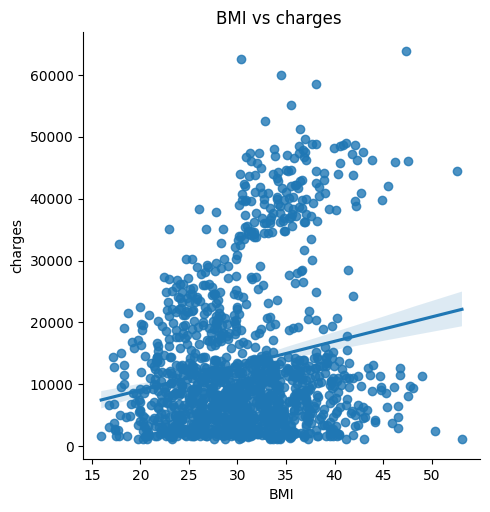

In [6]:
## plotting between  bmi(continueous) and charges(continueous)
sns.lmplot( x = 'bmi', y = 'charges',data = df)
plt.xlabel("BMI")
plt.ylabel("charges")
plt.title('BMI vs charges ')

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

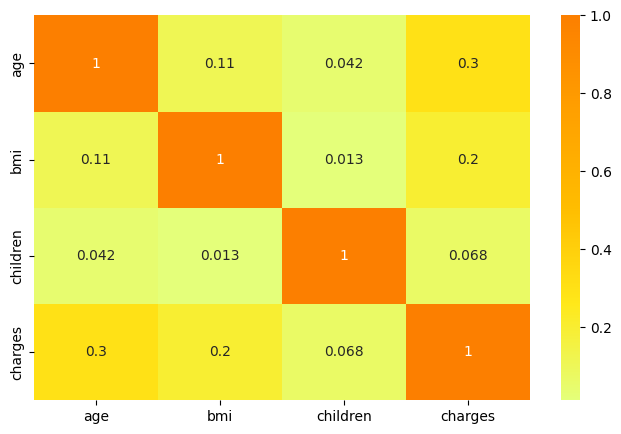

In [9]:
## correlation plot
corr = df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Wistia',annot= True)

<Axes: xlabel='charges', ylabel='Count'>

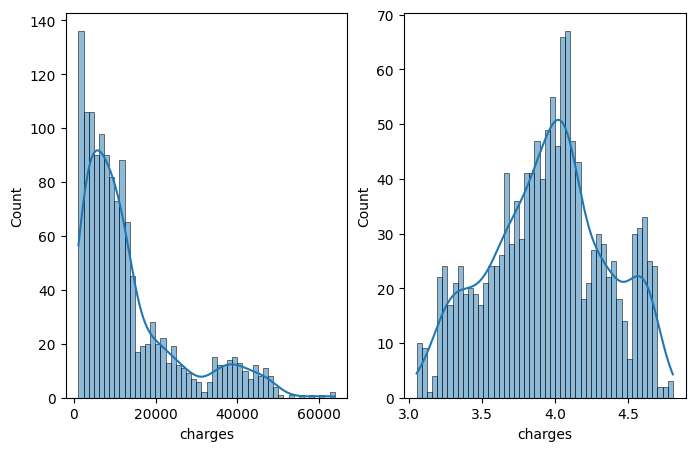

In [10]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
## target variable
sns.histplot(df['charges'],kde = True,bins = 50,fill= True,ax = ax1)
# data is rightskewed
# to correct the skewness in the data ,we perform log transformation
sns.histplot(np.log10(df['charges']),kde = True,bins = 50,fill= True,ax = ax2)

<Axes: xlabel='smoker', ylabel='charges'>

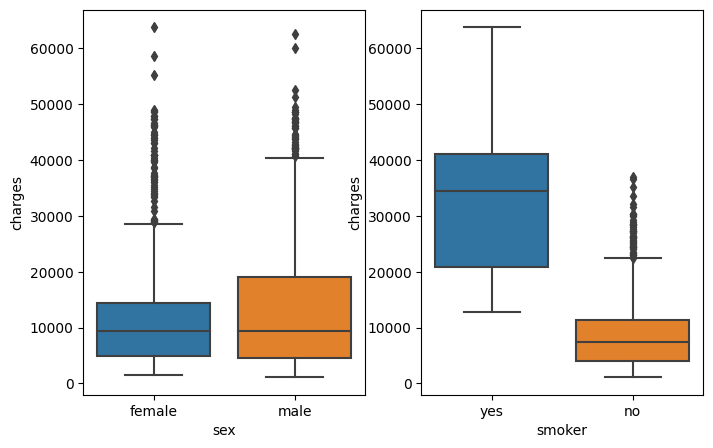

In [11]:
# plot smoker with charges and sex with charges
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(x='sex',y='charges',data=df,ax=ax1)
sns.boxplot(x='smoker',y='charges',data=df,ax=ax2)

In [12]:
## children vs charges

<Axes: xlabel='children', ylabel='charges'>

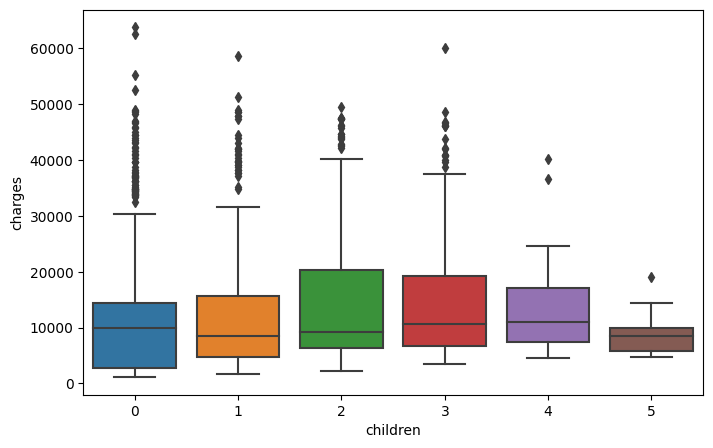

In [13]:
df['children'].unique()
sns.boxplot(x='children',y='charges',data=df)

## Data Preprocesing - Encoding

In [14]:
categorical_columns = ['sex','children','smoker','region']
# one hot encoding
df_encoded = pd.get_dummies(data = df,prefix ='OHE',prefix_sep = '_',columns = categorical_columns,drop_first=True,dtype ='int8')

In [15]:
df_encoded.head()
df_encoded['charges'] = np.log10(df_encoded['charges'])


In [16]:
df_encoded.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,4.227499,0,0,0,0,0,0,1,0,0,1
1,18,33.770,3.236928,1,1,0,0,0,0,0,0,1,0
2,28,33.000,3.648308,1,0,0,1,0,0,0,0,1,0
3,33,22.705,4.342116,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3.587358,1,0,0,0,0,0,0,1,0,0


In [17]:
x = df_encoded.drop(['charges'],axis=1) #input  features
y = df_encoded['charges']# target variable

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 23)

## training the model

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [20]:
lin_reg.coef_

array([ 0.01439002,  0.00587029, -0.02943099,  0.06490821,  0.11852708,
        0.10600906,  0.22728308,  0.20239429,  0.67336524, -0.02425312,
       -0.06365815, -0.05798184])

In [21]:
lin_reg.intercept_

3.0657592155426676

## test the model

In [22]:
y_pred = lin_reg.predict(x_test)

In [23]:
y_pred

array([4.05111071, 3.76323003, 4.49471303, 3.94587129, 3.65154412,
       3.90016511, 4.66880948, 3.71809718, 4.11984569, 4.75822147,
       3.5298516 , 4.79365531, 3.5607964 , 4.1019963 , 3.82468072,
       3.7059901 , 3.74948038, 3.52244257, 4.53481197, 4.53638645,
       4.86542784, 3.9776379 , 3.84918757, 3.99032979, 4.59907446,
       3.69570472, 3.71458617, 4.17578721, 3.46744487, 3.96034688,
       4.07722567, 3.54699262, 3.65033397, 4.10456405, 3.81135188,
       4.26711922, 4.06901467, 3.92135685, 3.99900304, 3.64326587,
       3.99441526, 4.6013979 , 3.99161371, 4.58591857, 4.02182527,
       4.03845297, 3.67917003, 3.71615623, 3.93688137, 3.77572784,
       4.08868301, 3.84225304, 3.96881833, 3.6052219 , 3.66610261,
       4.06214373, 4.0207601 , 3.98127049, 3.83175689, 4.17762365,
       4.32177717, 3.6886493 , 3.43380444, 3.66598796, 3.53355203,
       3.74664171, 3.48583603, 3.45059346, 3.66158078, 4.10661913,
       3.76913543, 4.59179609, 3.94060076, 4.48647861, 3.48334

In [24]:
mean_squared_error(y_pred,y_test)

0.03532625850724222

##R2 square

In [25]:
lin_reg.score(x_test,y_test)# 0.779*100 =77.9 % accurate

0.7795687545055319